In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib

import seaborn as sns


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


### Importing the dataset

In [2]:
df= pd.read_csv("D:\Projects\Data-Analyst-Projects\PythonProject\movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Understanding the Data
df.shape

(7668, 15)

In [4]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Data Cleaning



#### Dealing with  null values

In [6]:
#Checking null values

df.isnull().sum()


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [7]:
# droping null values

df= df.dropna(subset=['gross', 'budget'])
df.shape

(5436, 15)

#### Dealing with duplicates

In [8]:
df[df.duplicated()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


###### *There are no duplicates

#### Changing Data Types


In [9]:
df = df.astype({"budget" : "int64", "gross" : "int64", "votes" : "int64"})
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   int64  
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5435 non-null   object 
 11  budget    5436 non-null   int64  
 12  gross     5436 non-null   int64  
 13  company   5434 non-null   object 
 14  runtime   5435 non-null   float64
dtypes: float64(2), int64(4), object(9)
memory usage: 679.5+ KB


#### Statistical Insights

In [10]:
#Turning it into readable format
pd.options.display.float_format = "{:.1f}".format
df.describe(include = [np.number]).T

df.describe()

,year,score,votes,budget,gross,runtime
count,5436.0,5436.0,5436.0,5436.0,5436.0,5435.0
mean,2001.7,6.4,114911.0,35938637.6,103004458.1,108.2
std,10.5,1.0,184225.5,41547704.9,187105108.7,18.1
min,1980.0,1.9,195.0,6000.0,309.0,63.0
25%,1993.0,5.8,19000.0,10000000.0,10674118.8,95.0
50%,2002.0,6.5,52000.0,21000000.0,36711988.0,105.0
75%,2011.0,7.1,129000.0,45000000.0,111947847.8,118.0
max,2020.0,9.3,2400000.0,356000000.0,2847246203.0,271.0


#### * The dataset is from the year 1980-2020
#### * The highest budget for a movie is 356 million dollars. 

In [11]:
df.describe(exclude = "number")

,name,rating,genre,released,director,writer,star,country,company
count,5436,5424,5436,5436,5436,5436,5436,5435,5434
unique,5351,10,15,2566,2069,3215,1852,50,1481
top,Hercules,R,Comedy,"January 25, 2002 (United States)",Woody Allen,Woody Allen,Nicolas Cage,United States,Universal Pictures
freq,3,2597,1496,7,33,32,40,4326,330


#### * As expected, most of the movies are from USA (4319 movies out of 5421)
#### * Most popular genre is Comedy

# Correlation

In [12]:
# We will be using pearson's method of correlation
df.corr()

,year,score,votes,budget,gross,runtime
year,1.0,0.1,0.2,0.3,0.3,0.1
score,0.1,1.0,0.5,0.1,0.2,0.4
votes,0.2,0.5,1.0,0.4,0.6,0.4
budget,0.3,0.1,0.4,1.0,0.7,0.3
gross,0.3,0.2,0.6,0.7,1.0,0.3
runtime,0.1,0.4,0.4,0.3,0.3,1.0


##### * Gross and budget are highly correlated
##### * Also, votes shows high correlation with gross

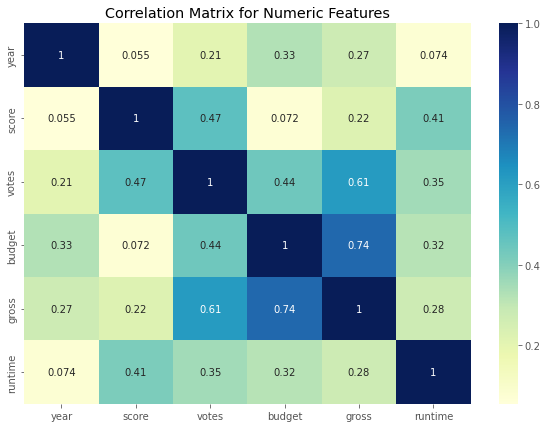

In [13]:
# Visualising the correlation with heatmap

movies_corr = df.corr()

plt.subplots(figsize = (10, 7))
sns.heatmap(movies_corr, annot = True, cmap="YlGnBu")
plt.title('Correlation Matrix for Numeric Features')
plt.show()


In [14]:
# Now, let's look at movies with the highest revenue
df_sorted = df.sort_values(by=['gross'],inplace = False, ascending = False)
df_sorted.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0


# Data Visualization

#### Budget VS Revenue

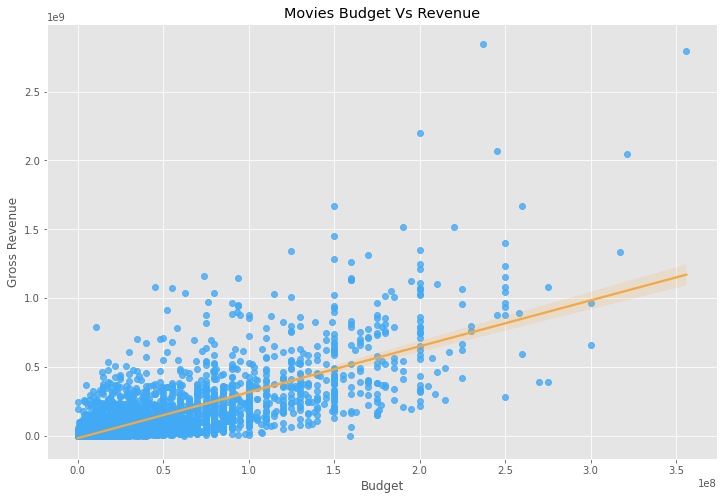

In [15]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws= {'color' : '#42aaf5'}, line_kws = {'color' : '#f5a742'})

plt.title('Movies Budget Vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

##### * There is a positive relation. As budget increases, revenue also increases

#### Votes VS Gross Earnings

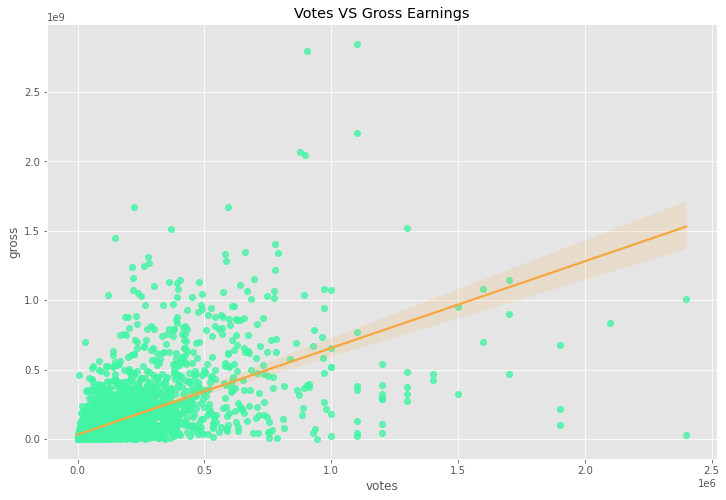

In [16]:
sns.regplot(x='votes', y='gross',data=df ,scatter_kws ={'color':'#42f5a4'}, line_kws={'color':'#f5a742'})
plt.title('Votes VS Gross Earnings')

plt.show()
